# Implementaion

In [34]:
import numpy as np

In [35]:
input_size=3
layers=[4,3]
output_size=2

In [36]:
def softmax(a):
    e_pa=np.exp(a)
    ans=e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans

In [37]:
a=np.array([[10,20],
            [20,20]])
a_=softmax(a)
print(a_)

[[4.53978687e-05 9.99954602e-01]
 [5.00000000e-01 5.00000000e-01]]


In [38]:
class NeuralNetworks:
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        model={}
        
        #First layer
        model['W1']=np.random.randn(input_size,layers[0])
        model['b1']=np.zeros((1,layers[0]))
        
        #Second layer
        model['W2']=np.random.randn(layers[0],layers[1])
        model['b2']=np.zeros((1,layers[1]))
        
        #Third layer
        model['W3']=np.random.randn(layers[1],output_size)
        model['b3']=np.zeros((1,output_size))
        
        self.model=model
        
    def forward(self,x):
        W1,W2,W3=self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3=self.model['b1'],self.model['b2'],self.model['b3']
        
        z1=np.dot(x,W1) + b1
        a1=np.tanh(z1)
        
        z2=np.dot(a1,W2) + b2
        a2=np.tanh(z2)
        
        z3=np.dot(a2,W3) + b3
        y_=softmax(z3)
        
        self.activation_outputs=(a1,a2,y_)
        return y_
        
    def backward(self,x,y,learning_rate=0.001):
        W1,W2,W3=self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3=self.model['b1'],self.model['b2'],self.model['b3']
        m=x.shape[0]
        
        a1,a2,y_=self.activation_outputs
        
        delta3= y_ - y
        dw3=np.dot(a2.T,delta3)
        db3=np.sum(delta3,axis=0)/float(m)
        
        delta2=(1-np.square(a2))*np.dot(delta3,W3.T)
        dw2=np.dot(a1.T,delta2)
        db2=np.sum(delta2,axis=0)/float(m)
        
        delta1=(1-np.square(a1))*np.dot(delta2,W2.T)
        dw1=np.dot(X.T,delta1)
        db1=np.sum(delta1,axis=0)/float(m)
        
        
        #Update the weights using gradient descent
        self.model['W1'] -= learning_rate*dw1
        self.model['b1'] -= learning_rate*db1 
        
        self.model['W2'] -= learning_rate*dw2
        self.model['b2'] -= learning_rate*db2
        
        self.model['W3'] -= learning_rate*dw3
        self.model['b3'] -= learning_rate*db3
        
    def predict(self,x):
        y_out=self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        W1,W2,W3=self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_=self.activation_outputs
        
        print("W1",W1.shape)
        print("a1",a1.shape)
        
        print("W2",W2.shape)
        print("a2",a2.shape)
        
        print("W3",W3.shape)
        print("Y_",y_.shape)
          
        

In [39]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l

def one_hot(y,depth):
    m=y.shape[0]
    y_oht=np.zeros((m,depth))
    y_oht[np.arange(m),y]=1
    return y_oht

In [40]:
#Generate datasets
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [41]:
X,Y=make_circles(n_samples=500,shuffle=True,noise=.05,random_state=1,factor=0.8)

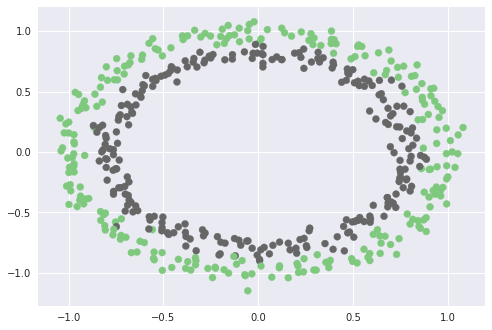

In [42]:
plt.style.use('seaborn')
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

In [43]:
print(Y)

[1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1
 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0
 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1
 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1
 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1
 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1
 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0
 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0
 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1
 0 1 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1
 1 0 1 1 0 0 1 0 0 1 1 0 

In [44]:
y_oht=one_hot(Y,3)
print(y_oht)

[[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


# Training the model

In [45]:
model=NeuralNetworks(input_size=2,layers=[10,5],output_size=2)

In [46]:
model.forward(X).shape

(500, 2)

In [47]:
model.forward(X)

array([[0.55194332, 0.44805668],
       [0.33167157, 0.66832843],
       [0.57653141, 0.42346859],
       [0.34687297, 0.65312703],
       [0.61867246, 0.38132754],
       [0.58503885, 0.41496115],
       [0.47183242, 0.52816758],
       [0.56202089, 0.43797911],
       [0.55948116, 0.44051884],
       [0.35852707, 0.64147293],
       [0.35625852, 0.64374148],
       [0.42484217, 0.57515783],
       [0.42724561, 0.57275439],
       [0.40134005, 0.59865995],
       [0.5457912 , 0.4542088 ],
       [0.48628249, 0.51371751],
       [0.51508627, 0.48491373],
       [0.56442427, 0.43557573],
       [0.44691487, 0.55308513],
       [0.44282048, 0.55717952],
       [0.56647661, 0.43352339],
       [0.50944887, 0.49055113],
       [0.45875367, 0.54124633],
       [0.58171721, 0.41828279],
       [0.43446665, 0.56553335],
       [0.43437173, 0.56562827],
       [0.56393344, 0.43606656],
       [0.35497999, 0.64502001],
       [0.42287443, 0.57712557],
       [0.71805694, 0.28194306],
       [0.

In [48]:
model.summary()

W1 (2, 10)
a1 (500, 10)
W2 (10, 5)
a2 (500, 5)
W3 (5, 2)
Y_ (500, 2)


In [49]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss=[]
    classes=2
    
    Y_OHT=one_hot(Y,classes)
    
    for ix in range(epochs):
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        training_loss.append(l)
        model.backward(X,Y_OHT,learning_rate)
        
        if(logs):
            print("Epoch %d Loss %.4f"%(ix,l))
            
    return training_loss

In [50]:
losses=train(X,Y,model,8000,0.001)

Epoch 0 Loss 0.3584
Epoch 1 Loss 0.3486
Epoch 2 Loss 0.3480
Epoch 3 Loss 0.3478
Epoch 4 Loss 0.3476
Epoch 5 Loss 0.3475
Epoch 6 Loss 0.3474
Epoch 7 Loss 0.3473
Epoch 8 Loss 0.3472
Epoch 9 Loss 0.3472
Epoch 10 Loss 0.3471
Epoch 11 Loss 0.3471
Epoch 12 Loss 0.3470
Epoch 13 Loss 0.3470
Epoch 14 Loss 0.3469
Epoch 15 Loss 0.3469
Epoch 16 Loss 0.3469
Epoch 17 Loss 0.3469
Epoch 18 Loss 0.3468
Epoch 19 Loss 0.3468
Epoch 20 Loss 0.3468
Epoch 21 Loss 0.3468
Epoch 22 Loss 0.3467
Epoch 23 Loss 0.3467
Epoch 24 Loss 0.3467
Epoch 25 Loss 0.3467
Epoch 26 Loss 0.3467
Epoch 27 Loss 0.3466
Epoch 28 Loss 0.3466
Epoch 29 Loss 0.3466
Epoch 30 Loss 0.3466
Epoch 31 Loss 0.3466
Epoch 32 Loss 0.3466
Epoch 33 Loss 0.3465
Epoch 34 Loss 0.3465
Epoch 35 Loss 0.3465
Epoch 36 Loss 0.3465
Epoch 37 Loss 0.3465
Epoch 38 Loss 0.3465
Epoch 39 Loss 0.3464
Epoch 40 Loss 0.3464
Epoch 41 Loss 0.3464
Epoch 42 Loss 0.3464
Epoch 43 Loss 0.3464
Epoch 44 Loss 0.3464
Epoch 45 Loss 0.3464
Epoch 46 Loss 0.3463
Epoch 47 Loss 0.3463
Ep

Epoch 405 Loss 0.3423
Epoch 406 Loss 0.3423
Epoch 407 Loss 0.3423
Epoch 408 Loss 0.3423
Epoch 409 Loss 0.3423
Epoch 410 Loss 0.3422
Epoch 411 Loss 0.3422
Epoch 412 Loss 0.3422
Epoch 413 Loss 0.3422
Epoch 414 Loss 0.3422
Epoch 415 Loss 0.3422
Epoch 416 Loss 0.3421
Epoch 417 Loss 0.3421
Epoch 418 Loss 0.3421
Epoch 419 Loss 0.3421
Epoch 420 Loss 0.3421
Epoch 421 Loss 0.3420
Epoch 422 Loss 0.3420
Epoch 423 Loss 0.3420
Epoch 424 Loss 0.3420
Epoch 425 Loss 0.3420
Epoch 426 Loss 0.3419
Epoch 427 Loss 0.3419
Epoch 428 Loss 0.3419
Epoch 429 Loss 0.3419
Epoch 430 Loss 0.3419
Epoch 431 Loss 0.3419
Epoch 432 Loss 0.3418
Epoch 433 Loss 0.3418
Epoch 434 Loss 0.3418
Epoch 435 Loss 0.3418
Epoch 436 Loss 0.3418
Epoch 437 Loss 0.3417
Epoch 438 Loss 0.3417
Epoch 439 Loss 0.3417
Epoch 440 Loss 0.3417
Epoch 441 Loss 0.3417
Epoch 442 Loss 0.3416
Epoch 443 Loss 0.3416
Epoch 444 Loss 0.3416
Epoch 445 Loss 0.3416
Epoch 446 Loss 0.3416
Epoch 447 Loss 0.3415
Epoch 448 Loss 0.3415
Epoch 449 Loss 0.3415
Epoch 450 

Epoch 870 Loss 0.3358
Epoch 871 Loss 0.3357
Epoch 872 Loss 0.3357
Epoch 873 Loss 0.3356
Epoch 874 Loss 0.3357
Epoch 875 Loss 0.3356
Epoch 876 Loss 0.3356
Epoch 877 Loss 0.3355
Epoch 878 Loss 0.3356
Epoch 879 Loss 0.3355
Epoch 880 Loss 0.3355
Epoch 881 Loss 0.3354
Epoch 882 Loss 0.3355
Epoch 883 Loss 0.3353
Epoch 884 Loss 0.3354
Epoch 885 Loss 0.3353
Epoch 886 Loss 0.3353
Epoch 887 Loss 0.3352
Epoch 888 Loss 0.3353
Epoch 889 Loss 0.3352
Epoch 890 Loss 0.3352
Epoch 891 Loss 0.3351
Epoch 892 Loss 0.3352
Epoch 893 Loss 0.3351
Epoch 894 Loss 0.3351
Epoch 895 Loss 0.3350
Epoch 896 Loss 0.3351
Epoch 897 Loss 0.3349
Epoch 898 Loss 0.3350
Epoch 899 Loss 0.3349
Epoch 900 Loss 0.3349
Epoch 901 Loss 0.3348
Epoch 902 Loss 0.3349
Epoch 903 Loss 0.3348
Epoch 904 Loss 0.3348
Epoch 905 Loss 0.3347
Epoch 906 Loss 0.3348
Epoch 907 Loss 0.3347
Epoch 908 Loss 0.3347
Epoch 909 Loss 0.3346
Epoch 910 Loss 0.3346
Epoch 911 Loss 0.3345
Epoch 912 Loss 0.3346
Epoch 913 Loss 0.3345
Epoch 914 Loss 0.3345
Epoch 915 

Epoch 1331 Loss 0.3198
Epoch 1332 Loss 0.3193
Epoch 1333 Loss 0.3197
Epoch 1334 Loss 0.3192
Epoch 1335 Loss 0.3196
Epoch 1336 Loss 0.3191
Epoch 1337 Loss 0.3196
Epoch 1338 Loss 0.3190
Epoch 1339 Loss 0.3195
Epoch 1340 Loss 0.3190
Epoch 1341 Loss 0.3194
Epoch 1342 Loss 0.3189
Epoch 1343 Loss 0.3194
Epoch 1344 Loss 0.3188
Epoch 1345 Loss 0.3193
Epoch 1346 Loss 0.3188
Epoch 1347 Loss 0.3192
Epoch 1348 Loss 0.3187
Epoch 1349 Loss 0.3192
Epoch 1350 Loss 0.3186
Epoch 1351 Loss 0.3191
Epoch 1352 Loss 0.3185
Epoch 1353 Loss 0.3190
Epoch 1354 Loss 0.3185
Epoch 1355 Loss 0.3190
Epoch 1356 Loss 0.3184
Epoch 1357 Loss 0.3189
Epoch 1358 Loss 0.3183
Epoch 1359 Loss 0.3188
Epoch 1360 Loss 0.3183
Epoch 1361 Loss 0.3188
Epoch 1362 Loss 0.3182
Epoch 1363 Loss 0.3187
Epoch 1364 Loss 0.3181
Epoch 1365 Loss 0.3186
Epoch 1366 Loss 0.3180
Epoch 1367 Loss 0.3186
Epoch 1368 Loss 0.3180
Epoch 1369 Loss 0.3185
Epoch 1370 Loss 0.3179
Epoch 1371 Loss 0.3184
Epoch 1372 Loss 0.3178
Epoch 1373 Loss 0.3184
Epoch 1374 

Epoch 1753 Loss 0.2976
Epoch 1754 Loss 0.2965
Epoch 1755 Loss 0.2974
Epoch 1756 Loss 0.2964
Epoch 1757 Loss 0.2973
Epoch 1758 Loss 0.2962
Epoch 1759 Loss 0.2971
Epoch 1760 Loss 0.2960
Epoch 1761 Loss 0.2969
Epoch 1762 Loss 0.2959
Epoch 1763 Loss 0.2968
Epoch 1764 Loss 0.2957
Epoch 1765 Loss 0.2966
Epoch 1766 Loss 0.2955
Epoch 1767 Loss 0.2964
Epoch 1768 Loss 0.2954
Epoch 1769 Loss 0.2963
Epoch 1770 Loss 0.2952
Epoch 1771 Loss 0.2961
Epoch 1772 Loss 0.2950
Epoch 1773 Loss 0.2959
Epoch 1774 Loss 0.2949
Epoch 1775 Loss 0.2957
Epoch 1776 Loss 0.2947
Epoch 1777 Loss 0.2956
Epoch 1778 Loss 0.2945
Epoch 1779 Loss 0.2954
Epoch 1780 Loss 0.2943
Epoch 1781 Loss 0.2952
Epoch 1782 Loss 0.2942
Epoch 1783 Loss 0.2951
Epoch 1784 Loss 0.2940
Epoch 1785 Loss 0.2949
Epoch 1786 Loss 0.2938
Epoch 1787 Loss 0.2947
Epoch 1788 Loss 0.2937
Epoch 1789 Loss 0.2946
Epoch 1790 Loss 0.2935
Epoch 1791 Loss 0.2944
Epoch 1792 Loss 0.2933
Epoch 1793 Loss 0.2942
Epoch 1794 Loss 0.2932
Epoch 1795 Loss 0.2940
Epoch 1796 

Epoch 2224 Loss 0.2672
Epoch 2225 Loss 0.2687
Epoch 2226 Loss 0.2671
Epoch 2227 Loss 0.2686
Epoch 2228 Loss 0.2670
Epoch 2229 Loss 0.2685
Epoch 2230 Loss 0.2669
Epoch 2231 Loss 0.2684
Epoch 2232 Loss 0.2668
Epoch 2233 Loss 0.2682
Epoch 2234 Loss 0.2667
Epoch 2235 Loss 0.2681
Epoch 2236 Loss 0.2666
Epoch 2237 Loss 0.2680
Epoch 2238 Loss 0.2665
Epoch 2239 Loss 0.2679
Epoch 2240 Loss 0.2664
Epoch 2241 Loss 0.2678
Epoch 2242 Loss 0.2663
Epoch 2243 Loss 0.2677
Epoch 2244 Loss 0.2662
Epoch 2245 Loss 0.2676
Epoch 2246 Loss 0.2661
Epoch 2247 Loss 0.2675
Epoch 2248 Loss 0.2660
Epoch 2249 Loss 0.2674
Epoch 2250 Loss 0.2659
Epoch 2251 Loss 0.2673
Epoch 2252 Loss 0.2658
Epoch 2253 Loss 0.2672
Epoch 2254 Loss 0.2657
Epoch 2255 Loss 0.2671
Epoch 2256 Loss 0.2656
Epoch 2257 Loss 0.2669
Epoch 2258 Loss 0.2655
Epoch 2259 Loss 0.2668
Epoch 2260 Loss 0.2654
Epoch 2261 Loss 0.2667
Epoch 2262 Loss 0.2654
Epoch 2263 Loss 0.2666
Epoch 2264 Loss 0.2653
Epoch 2265 Loss 0.2665
Epoch 2266 Loss 0.2652
Epoch 2267 

Epoch 2701 Loss 0.2456
Epoch 2702 Loss 0.2733
Epoch 2703 Loss 0.3193
Epoch 2704 Loss 0.2605
Epoch 2705 Loss 0.2527
Epoch 2706 Loss 0.2938
Epoch 2707 Loss 0.2216
Epoch 2708 Loss 0.2309
Epoch 2709 Loss 0.2871
Epoch 2710 Loss 0.2120
Epoch 2711 Loss 0.2638
Epoch 2712 Loss 0.2235
Epoch 2713 Loss 0.2758
Epoch 2714 Loss 0.2916
Epoch 2715 Loss 0.2994
Epoch 2716 Loss 0.3092
Epoch 2717 Loss 0.2205
Epoch 2718 Loss 0.2346
Epoch 2719 Loss 0.2958
Epoch 2720 Loss 0.2513
Epoch 2721 Loss 0.2242
Epoch 2722 Loss 0.2514
Epoch 2723 Loss 0.2723
Epoch 2724 Loss 0.2410
Epoch 2725 Loss 0.2867
Epoch 2726 Loss 0.2055
Epoch 2727 Loss 0.2084
Epoch 2728 Loss 0.2354
Epoch 2729 Loss 0.2159
Epoch 2730 Loss 0.2604
Epoch 2731 Loss 0.2123
Epoch 2732 Loss 0.2461
Epoch 2733 Loss 0.2393
Epoch 2734 Loss 0.2744
Epoch 2735 Loss 0.2256
Epoch 2736 Loss 0.2186
Epoch 2737 Loss 0.2324
Epoch 2738 Loss 0.2383
Epoch 2739 Loss 0.2871
Epoch 2740 Loss 0.2552
Epoch 2741 Loss 0.2762
Epoch 2742 Loss 0.2730
Epoch 2743 Loss 0.2700
Epoch 2744 

Epoch 3172 Loss 0.2658
Epoch 3173 Loss 0.2838
Epoch 3174 Loss 0.2922
Epoch 3175 Loss 0.2137
Epoch 3176 Loss 0.2654
Epoch 3177 Loss 0.2383
Epoch 3178 Loss 0.2548
Epoch 3179 Loss 0.2146
Epoch 3180 Loss 0.2630
Epoch 3181 Loss 0.2406
Epoch 3182 Loss 0.3042
Epoch 3183 Loss 0.2354
Epoch 3184 Loss 0.1864
Epoch 3185 Loss 0.2189
Epoch 3186 Loss 0.1739
Epoch 3187 Loss 0.2033
Epoch 3188 Loss 0.2345
Epoch 3189 Loss 0.3570
Epoch 3190 Loss 0.2531
Epoch 3191 Loss 0.3180
Epoch 3192 Loss 0.2063
Epoch 3193 Loss 0.2303
Epoch 3194 Loss 0.3038
Epoch 3195 Loss 0.3220
Epoch 3196 Loss 0.2835
Epoch 3197 Loss 0.1882
Epoch 3198 Loss 0.1989
Epoch 3199 Loss 0.2208
Epoch 3200 Loss 0.2817
Epoch 3201 Loss 0.2476
Epoch 3202 Loss 0.2055
Epoch 3203 Loss 0.2645
Epoch 3204 Loss 0.1738
Epoch 3205 Loss 0.1841
Epoch 3206 Loss 0.2030
Epoch 3207 Loss 0.2842
Epoch 3208 Loss 0.2759
Epoch 3209 Loss 0.2347
Epoch 3210 Loss 0.2314
Epoch 3211 Loss 0.2645
Epoch 3212 Loss 0.2376
Epoch 3213 Loss 0.2234
Epoch 3214 Loss 0.2386
Epoch 3215 

Epoch 3611 Loss 0.1835
Epoch 3612 Loss 0.1664
Epoch 3613 Loss 0.1894
Epoch 3614 Loss 0.2063
Epoch 3615 Loss 0.2970
Epoch 3616 Loss 0.1594
Epoch 3617 Loss 0.1605
Epoch 3618 Loss 0.1873
Epoch 3619 Loss 0.1862
Epoch 3620 Loss 0.2646
Epoch 3621 Loss 0.1889
Epoch 3622 Loss 0.2807
Epoch 3623 Loss 0.2318
Epoch 3624 Loss 0.2388
Epoch 3625 Loss 0.3425
Epoch 3626 Loss 0.2913
Epoch 3627 Loss 0.1915
Epoch 3628 Loss 0.2306
Epoch 3629 Loss 0.1876
Epoch 3630 Loss 0.2045
Epoch 3631 Loss 0.1969
Epoch 3632 Loss 0.1778
Epoch 3633 Loss 0.2257
Epoch 3634 Loss 0.3178
Epoch 3635 Loss 0.3612
Epoch 3636 Loss 0.2954
Epoch 3637 Loss 0.2115
Epoch 3638 Loss 0.2642
Epoch 3639 Loss 0.1666
Epoch 3640 Loss 0.1968
Epoch 3641 Loss 0.2378
Epoch 3642 Loss 0.3565
Epoch 3643 Loss 0.2123
Epoch 3644 Loss 0.1918
Epoch 3645 Loss 0.2443
Epoch 3646 Loss 0.1769
Epoch 3647 Loss 0.2020
Epoch 3648 Loss 0.2215
Epoch 3649 Loss 0.3343
Epoch 3650 Loss 0.2426
Epoch 3651 Loss 0.2584
Epoch 3652 Loss 0.3504
Epoch 3653 Loss 0.2570
Epoch 3654 

Epoch 4070 Loss 0.2505
Epoch 4071 Loss 0.2619
Epoch 4072 Loss 0.2012
Epoch 4073 Loss 0.1625
Epoch 4074 Loss 0.2091
Epoch 4075 Loss 0.1941
Epoch 4076 Loss 0.2430
Epoch 4077 Loss 0.1927
Epoch 4078 Loss 0.2376
Epoch 4079 Loss 0.1710
Epoch 4080 Loss 0.1968
Epoch 4081 Loss 0.1948
Epoch 4082 Loss 0.2387
Epoch 4083 Loss 0.1539
Epoch 4084 Loss 0.2152
Epoch 4085 Loss 0.1615
Epoch 4086 Loss 0.1965
Epoch 4087 Loss 0.3137
Epoch 4088 Loss 0.3888
Epoch 4089 Loss 0.3500
Epoch 4090 Loss 0.1758
Epoch 4091 Loss 0.1474
Epoch 4092 Loss 0.1593
Epoch 4093 Loss 0.2133
Epoch 4094 Loss 0.2022
Epoch 4095 Loss 0.2512
Epoch 4096 Loss 0.2773
Epoch 4097 Loss 0.1859
Epoch 4098 Loss 0.1914
Epoch 4099 Loss 0.2822
Epoch 4100 Loss 0.1922
Epoch 4101 Loss 0.2817
Epoch 4102 Loss 0.1976
Epoch 4103 Loss 0.2005
Epoch 4104 Loss 0.2305
Epoch 4105 Loss 0.1677
Epoch 4106 Loss 0.1788
Epoch 4107 Loss 0.2027
Epoch 4108 Loss 0.3207
Epoch 4109 Loss 0.1736
Epoch 4110 Loss 0.1581
Epoch 4111 Loss 0.2054
Epoch 4112 Loss 0.1898
Epoch 4113 

Epoch 4489 Loss 0.3226
Epoch 4490 Loss 0.1993
Epoch 4491 Loss 0.2133
Epoch 4492 Loss 0.2258
Epoch 4493 Loss 0.2710
Epoch 4494 Loss 0.1587
Epoch 4495 Loss 0.1965
Epoch 4496 Loss 0.3061
Epoch 4497 Loss 0.2158
Epoch 4498 Loss 0.1998
Epoch 4499 Loss 0.2441
Epoch 4500 Loss 0.2095
Epoch 4501 Loss 0.2390
Epoch 4502 Loss 0.2752
Epoch 4503 Loss 0.2175
Epoch 4504 Loss 0.1997
Epoch 4505 Loss 0.2727
Epoch 4506 Loss 0.1627
Epoch 4507 Loss 0.2021
Epoch 4508 Loss 0.1360
Epoch 4509 Loss 0.1618
Epoch 4510 Loss 0.1524
Epoch 4511 Loss 0.2192
Epoch 4512 Loss 0.1546
Epoch 4513 Loss 0.1709
Epoch 4514 Loss 0.2160
Epoch 4515 Loss 0.2390
Epoch 4516 Loss 0.1984
Epoch 4517 Loss 0.1988
Epoch 4518 Loss 0.3196
Epoch 4519 Loss 0.2980
Epoch 4520 Loss 0.1697
Epoch 4521 Loss 0.2178
Epoch 4522 Loss 0.1880
Epoch 4523 Loss 0.2679
Epoch 4524 Loss 0.3127
Epoch 4525 Loss 0.2229
Epoch 4526 Loss 0.1957
Epoch 4527 Loss 0.2191
Epoch 4528 Loss 0.1642
Epoch 4529 Loss 0.2358
Epoch 4530 Loss 0.2803
Epoch 4531 Loss 0.3711
Epoch 4532 

Epoch 4938 Loss 0.1805
Epoch 4939 Loss 0.2290
Epoch 4940 Loss 0.1543
Epoch 4941 Loss 0.1421
Epoch 4942 Loss 0.1689
Epoch 4943 Loss 0.2547
Epoch 4944 Loss 0.1871
Epoch 4945 Loss 0.1505
Epoch 4946 Loss 0.2374
Epoch 4947 Loss 0.1483
Epoch 4948 Loss 0.1828
Epoch 4949 Loss 0.1962
Epoch 4950 Loss 0.2587
Epoch 4951 Loss 0.2726
Epoch 4952 Loss 0.1783
Epoch 4953 Loss 0.1558
Epoch 4954 Loss 0.1969
Epoch 4955 Loss 0.1887
Epoch 4956 Loss 0.3045
Epoch 4957 Loss 0.2313
Epoch 4958 Loss 0.3365
Epoch 4959 Loss 0.2281
Epoch 4960 Loss 0.2632
Epoch 4961 Loss 0.2841
Epoch 4962 Loss 0.3817
Epoch 4963 Loss 0.1782
Epoch 4964 Loss 0.1487
Epoch 4965 Loss 0.1674
Epoch 4966 Loss 0.1752
Epoch 4967 Loss 0.2155
Epoch 4968 Loss 0.1930
Epoch 4969 Loss 0.3007
Epoch 4970 Loss 0.2083
Epoch 4971 Loss 0.1992
Epoch 4972 Loss 0.2265
Epoch 4973 Loss 0.2313
Epoch 4974 Loss 0.3107
Epoch 4975 Loss 0.1580
Epoch 4976 Loss 0.1466
Epoch 4977 Loss 0.1643
Epoch 4978 Loss 0.2512
Epoch 4979 Loss 0.1757
Epoch 4980 Loss 0.1616
Epoch 4981 

Epoch 5417 Loss 0.2629
Epoch 5418 Loss 0.1476
Epoch 5419 Loss 0.1528
Epoch 5420 Loss 0.1466
Epoch 5421 Loss 0.1543
Epoch 5422 Loss 0.1518
Epoch 5423 Loss 0.2237
Epoch 5424 Loss 0.2269
Epoch 5425 Loss 0.3013
Epoch 5426 Loss 0.2536
Epoch 5427 Loss 0.1763
Epoch 5428 Loss 0.2683
Epoch 5429 Loss 0.2044
Epoch 5430 Loss 0.3572
Epoch 5431 Loss 0.2162
Epoch 5432 Loss 0.2492
Epoch 5433 Loss 0.2205
Epoch 5434 Loss 0.3448
Epoch 5435 Loss 0.3258
Epoch 5436 Loss 0.2515
Epoch 5437 Loss 0.2140
Epoch 5438 Loss 0.2412
Epoch 5439 Loss 0.1743
Epoch 5440 Loss 0.2316
Epoch 5441 Loss 0.1490
Epoch 5442 Loss 0.1858
Epoch 5443 Loss 0.2245
Epoch 5444 Loss 0.3247
Epoch 5445 Loss 0.2194
Epoch 5446 Loss 0.1769
Epoch 5447 Loss 0.1570
Epoch 5448 Loss 0.1500
Epoch 5449 Loss 0.1763
Epoch 5450 Loss 0.1452
Epoch 5451 Loss 0.1593
Epoch 5452 Loss 0.1489
Epoch 5453 Loss 0.2009
Epoch 5454 Loss 0.3228
Epoch 5455 Loss 0.3001
Epoch 5456 Loss 0.2053
Epoch 5457 Loss 0.2465
Epoch 5458 Loss 0.1995
Epoch 5459 Loss 0.2385
Epoch 5460 

Epoch 5843 Loss 0.2188
Epoch 5844 Loss 0.2150
Epoch 5845 Loss 0.2832
Epoch 5846 Loss 0.1447
Epoch 5847 Loss 0.1484
Epoch 5848 Loss 0.1492
Epoch 5849 Loss 0.2169
Epoch 5850 Loss 0.2190
Epoch 5851 Loss 0.3865
Epoch 5852 Loss 0.2470
Epoch 5853 Loss 0.2928
Epoch 5854 Loss 0.2269
Epoch 5855 Loss 0.3339
Epoch 5856 Loss 0.1616
Epoch 5857 Loss 0.1312
Epoch 5858 Loss 0.1410
Epoch 5859 Loss 0.2111
Epoch 5860 Loss 0.1904
Epoch 5861 Loss 0.2466
Epoch 5862 Loss 0.1490
Epoch 5863 Loss 0.1145
Epoch 5864 Loss 0.1116
Epoch 5865 Loss 0.1134
Epoch 5866 Loss 0.1453
Epoch 5867 Loss 0.2043
Epoch 5868 Loss 0.3193
Epoch 5869 Loss 0.2209
Epoch 5870 Loss 0.1945
Epoch 5871 Loss 0.1846
Epoch 5872 Loss 0.1876
Epoch 5873 Loss 0.2006
Epoch 5874 Loss 0.2898
Epoch 5875 Loss 0.1930
Epoch 5876 Loss 0.2607
Epoch 5877 Loss 0.1622
Epoch 5878 Loss 0.1811
Epoch 5879 Loss 0.2458
Epoch 5880 Loss 0.2279
Epoch 5881 Loss 0.2200
Epoch 5882 Loss 0.2096
Epoch 5883 Loss 0.2663
Epoch 5884 Loss 0.1929
Epoch 5885 Loss 0.1806
Epoch 5886 

Epoch 6256 Loss 0.1330
Epoch 6257 Loss 0.1353
Epoch 6258 Loss 0.1908
Epoch 6259 Loss 0.2657
Epoch 6260 Loss 0.2050
Epoch 6261 Loss 0.1522
Epoch 6262 Loss 0.2122
Epoch 6263 Loss 0.1504
Epoch 6264 Loss 0.2542
Epoch 6265 Loss 0.1523
Epoch 6266 Loss 0.1184
Epoch 6267 Loss 0.1180
Epoch 6268 Loss 0.1401
Epoch 6269 Loss 0.1973
Epoch 6270 Loss 0.2592
Epoch 6271 Loss 0.2694
Epoch 6272 Loss 0.2442
Epoch 6273 Loss 0.2111
Epoch 6274 Loss 0.2668
Epoch 6275 Loss 0.1561
Epoch 6276 Loss 0.2164
Epoch 6277 Loss 0.2884
Epoch 6278 Loss 0.3886
Epoch 6279 Loss 0.2558
Epoch 6280 Loss 0.2256
Epoch 6281 Loss 0.2011
Epoch 6282 Loss 0.1950
Epoch 6283 Loss 0.1939
Epoch 6284 Loss 0.1865
Epoch 6285 Loss 0.2252
Epoch 6286 Loss 0.1666
Epoch 6287 Loss 0.1842
Epoch 6288 Loss 0.1714
Epoch 6289 Loss 0.2277
Epoch 6290 Loss 0.1153
Epoch 6291 Loss 0.1054
Epoch 6292 Loss 0.1038
Epoch 6293 Loss 0.1137
Epoch 6294 Loss 0.1458
Epoch 6295 Loss 0.2113
Epoch 6296 Loss 0.3280
Epoch 6297 Loss 0.2929
Epoch 6298 Loss 0.2082
Epoch 6299 

Epoch 6721 Loss 0.2529
Epoch 6722 Loss 0.1770
Epoch 6723 Loss 0.2586
Epoch 6724 Loss 0.1290
Epoch 6725 Loss 0.1884
Epoch 6726 Loss 0.2431
Epoch 6727 Loss 0.4135
Epoch 6728 Loss 0.2060
Epoch 6729 Loss 0.1829
Epoch 6730 Loss 0.1831
Epoch 6731 Loss 0.2301
Epoch 6732 Loss 0.2399
Epoch 6733 Loss 0.3856
Epoch 6734 Loss 0.2235
Epoch 6735 Loss 0.1492
Epoch 6736 Loss 0.1409
Epoch 6737 Loss 0.1337
Epoch 6738 Loss 0.1267
Epoch 6739 Loss 0.1160
Epoch 6740 Loss 0.1181
Epoch 6741 Loss 0.1187
Epoch 6742 Loss 0.1498
Epoch 6743 Loss 0.1204
Epoch 6744 Loss 0.1406
Epoch 6745 Loss 0.2354
Epoch 6746 Loss 0.1425
Epoch 6747 Loss 0.1120
Epoch 6748 Loss 0.1268
Epoch 6749 Loss 0.1277
Epoch 6750 Loss 0.2245
Epoch 6751 Loss 0.0975
Epoch 6752 Loss 0.0985
Epoch 6753 Loss 0.0946
Epoch 6754 Loss 0.1001
Epoch 6755 Loss 0.1012
Epoch 6756 Loss 0.1409
Epoch 6757 Loss 0.3044
Epoch 6758 Loss 0.4130
Epoch 6759 Loss 0.2542
Epoch 6760 Loss 0.2239
Epoch 6761 Loss 0.2064
Epoch 6762 Loss 0.2023
Epoch 6763 Loss 0.2276
Epoch 6764 

Epoch 7173 Loss 0.2031
Epoch 7174 Loss 0.2677
Epoch 7175 Loss 0.1320
Epoch 7176 Loss 0.1604
Epoch 7177 Loss 0.1620
Epoch 7178 Loss 0.3074
Epoch 7179 Loss 0.1885
Epoch 7180 Loss 0.2997
Epoch 7181 Loss 0.2270
Epoch 7182 Loss 0.1206
Epoch 7183 Loss 0.1482
Epoch 7184 Loss 0.1307
Epoch 7185 Loss 0.1916
Epoch 7186 Loss 0.1134
Epoch 7187 Loss 0.1136
Epoch 7188 Loss 0.1752
Epoch 7189 Loss 0.1372
Epoch 7190 Loss 0.2209
Epoch 7191 Loss 0.0857
Epoch 7192 Loss 0.0823
Epoch 7193 Loss 0.0801
Epoch 7194 Loss 0.0788
Epoch 7195 Loss 0.0797
Epoch 7196 Loss 0.0926
Epoch 7197 Loss 0.1746
Epoch 7198 Loss 0.3430
Epoch 7199 Loss 0.2676
Epoch 7200 Loss 0.2600
Epoch 7201 Loss 0.4583
Epoch 7202 Loss 0.2348
Epoch 7203 Loss 0.1917
Epoch 7204 Loss 0.2564
Epoch 7205 Loss 0.1784
Epoch 7206 Loss 0.2232
Epoch 7207 Loss 0.1765
Epoch 7208 Loss 0.2253
Epoch 7209 Loss 0.1429
Epoch 7210 Loss 0.1429
Epoch 7211 Loss 0.1327
Epoch 7212 Loss 0.1757
Epoch 7213 Loss 0.1150
Epoch 7214 Loss 0.1605
Epoch 7215 Loss 0.1078
Epoch 7216 

Epoch 7621 Loss 0.1246
Epoch 7622 Loss 0.2429
Epoch 7623 Loss 0.1000
Epoch 7624 Loss 0.1036
Epoch 7625 Loss 0.1208
Epoch 7626 Loss 0.2125
Epoch 7627 Loss 0.4354
Epoch 7628 Loss 0.4241
Epoch 7629 Loss 0.1617
Epoch 7630 Loss 0.1518
Epoch 7631 Loss 0.1588
Epoch 7632 Loss 0.1624
Epoch 7633 Loss 0.2160
Epoch 7634 Loss 0.1927
Epoch 7635 Loss 0.2639
Epoch 7636 Loss 0.1533
Epoch 7637 Loss 0.1351
Epoch 7638 Loss 0.1268
Epoch 7639 Loss 0.1202
Epoch 7640 Loss 0.1118
Epoch 7641 Loss 0.1012
Epoch 7642 Loss 0.0915
Epoch 7643 Loss 0.0876
Epoch 7644 Loss 0.0897
Epoch 7645 Loss 0.1053
Epoch 7646 Loss 0.1885
Epoch 7647 Loss 0.1066
Epoch 7648 Loss 0.1526
Epoch 7649 Loss 0.1317
Epoch 7650 Loss 0.2203
Epoch 7651 Loss 0.1186
Epoch 7652 Loss 0.1081
Epoch 7653 Loss 0.1218
Epoch 7654 Loss 0.1970
Epoch 7655 Loss 0.2955
Epoch 7656 Loss 0.3183
Epoch 7657 Loss 0.1225
Epoch 7658 Loss 0.1414
Epoch 7659 Loss 0.1945
Epoch 7660 Loss 0.1988
Epoch 7661 Loss 0.3193
Epoch 7662 Loss 0.2321
Epoch 7663 Loss 0.2733
Epoch 7664 

Text(0, 0.5, 'loss')

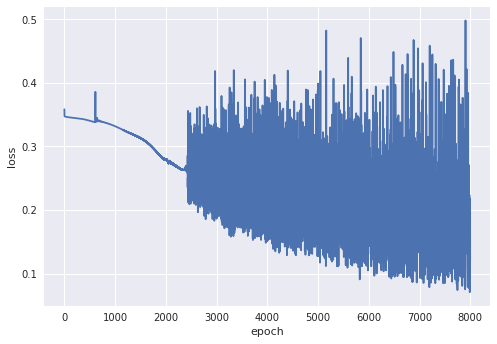

In [51]:
plt.plot(losses)
plt.xlabel("epoch")
plt.ylabel("loss")

In [52]:
outputs=model.predict(X)

In [53]:
print(outputs)

[0 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 0
 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0
 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1
 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0
 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1
 0 0 0 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0
 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1
 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0
 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0
 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0
 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1
 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1
 1 0 1 1 0 0 1 0 0 1 1 0 

In [54]:
outputs==Y

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [55]:
np.sum(outputs==Y)/Y.shape[0]

0.93

In [65]:
import visualize

ModuleNotFoundError: No module named 'visualize'